## LLM with Semantic Search

### 1. Introduction

Here we will learn How to integrate LLM into information search in your own application .

Assume you have website . Which consist of multiple courses. Initially if any one want to search any course . We normally used Keyword search . But now we can also use LLM . Which will do the search into website or database in more relevant way.

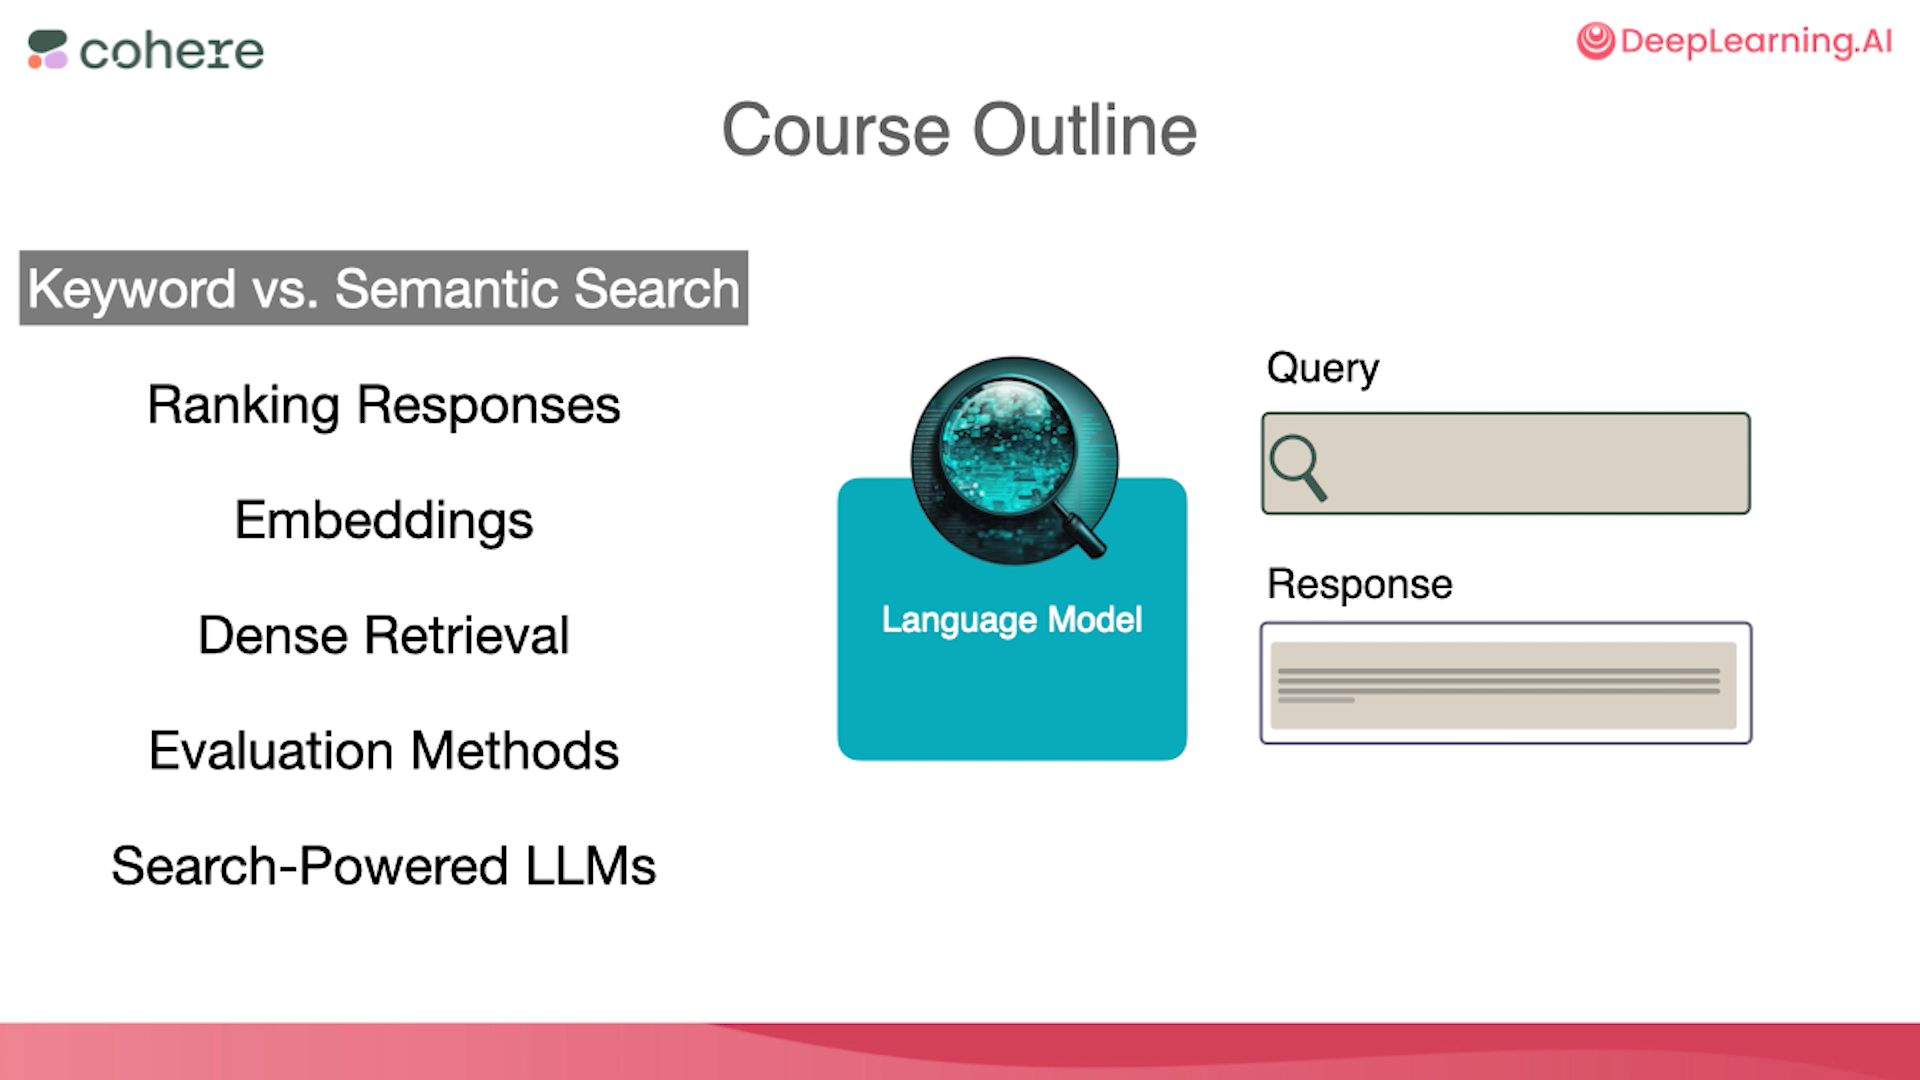

### 2. Keyword Search

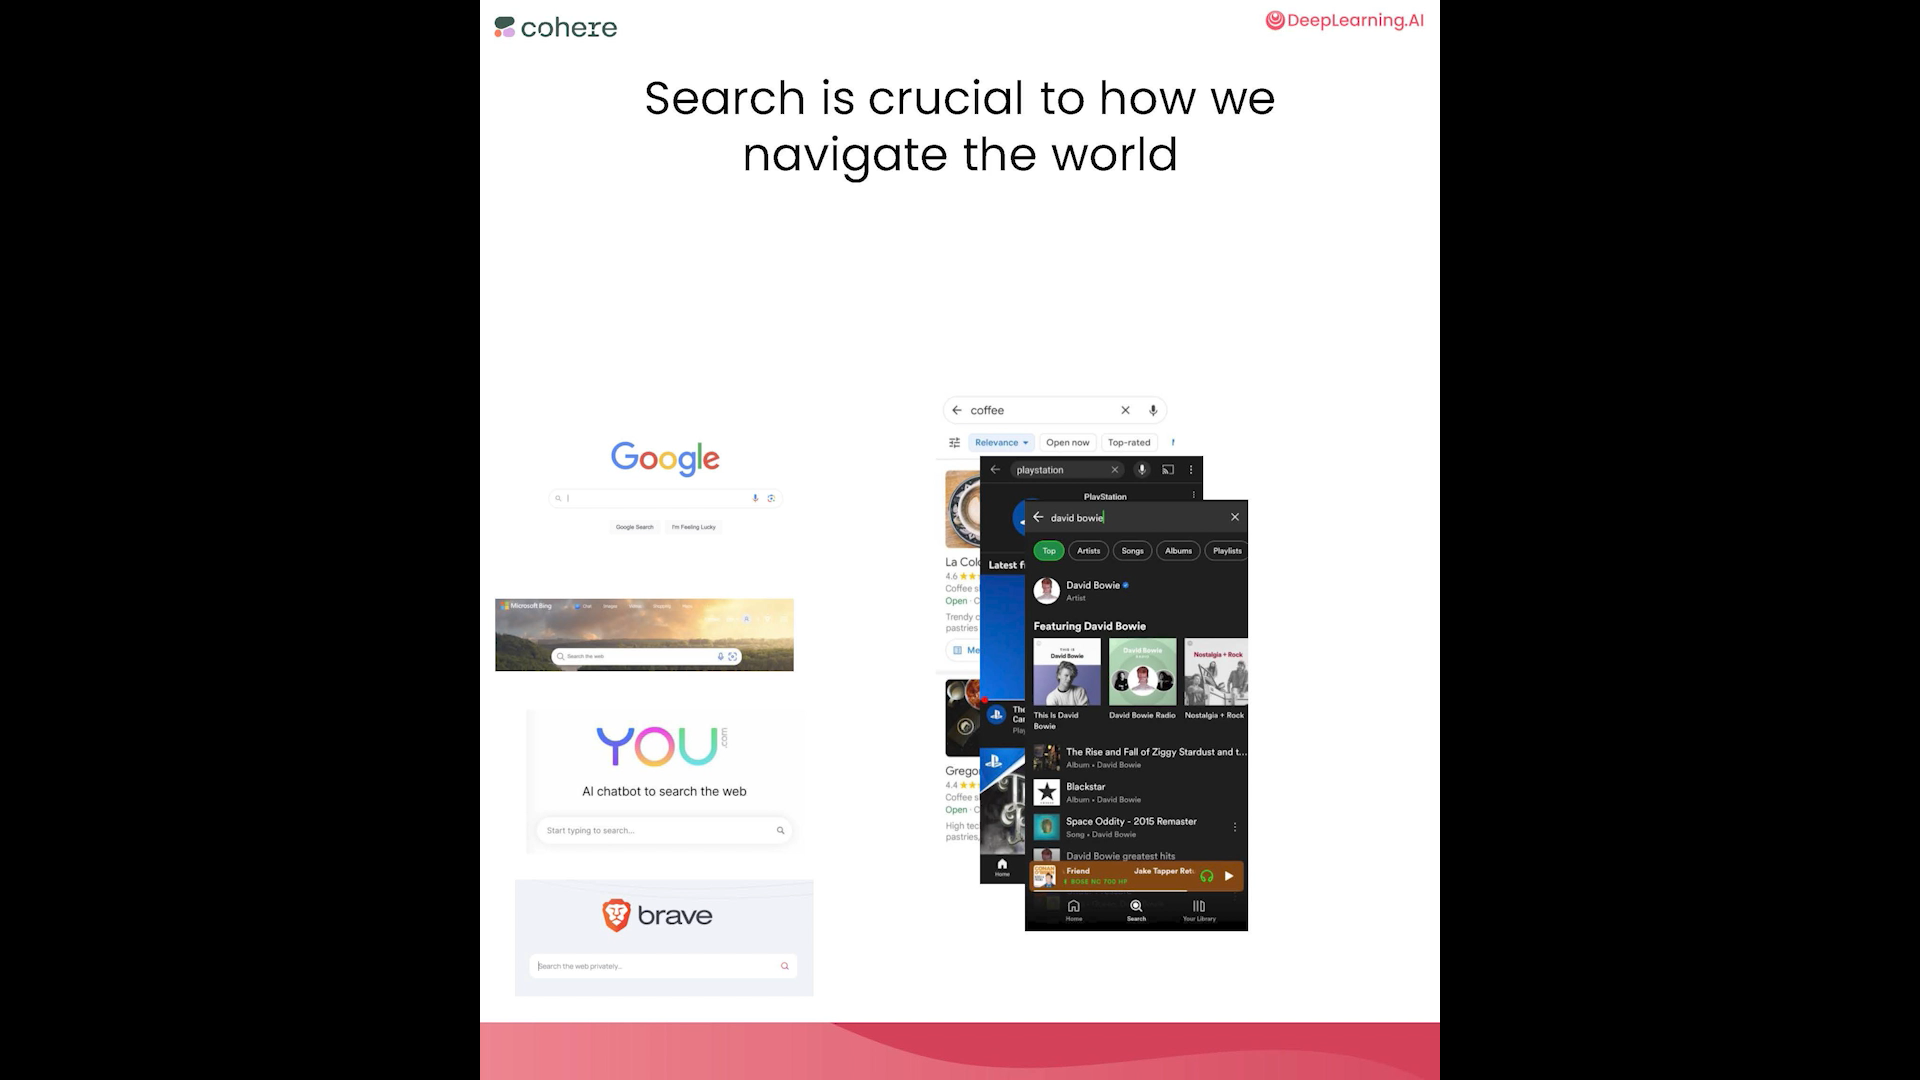

Weaviate - Open source database. It has keyword search capabilities also vector search capability 

In [1]:
import os
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file
import weaviate
auth_config = weaviate.auth.AuthApiKey(
    api_key=os.environ['WEAVIATE_API_KEY'])


client = weaviate.Client(
    ## Below url contains database which has 10 million records of wikipedia
    url=os.environ['WEAVIATE_API_URL'],
    auth_client_secret=auth_config,
    additional_headers={
        "X-Cohere-Api-Key": os.environ['COHERE_API_KEY'],
    }
)
client.is_ready() 

True

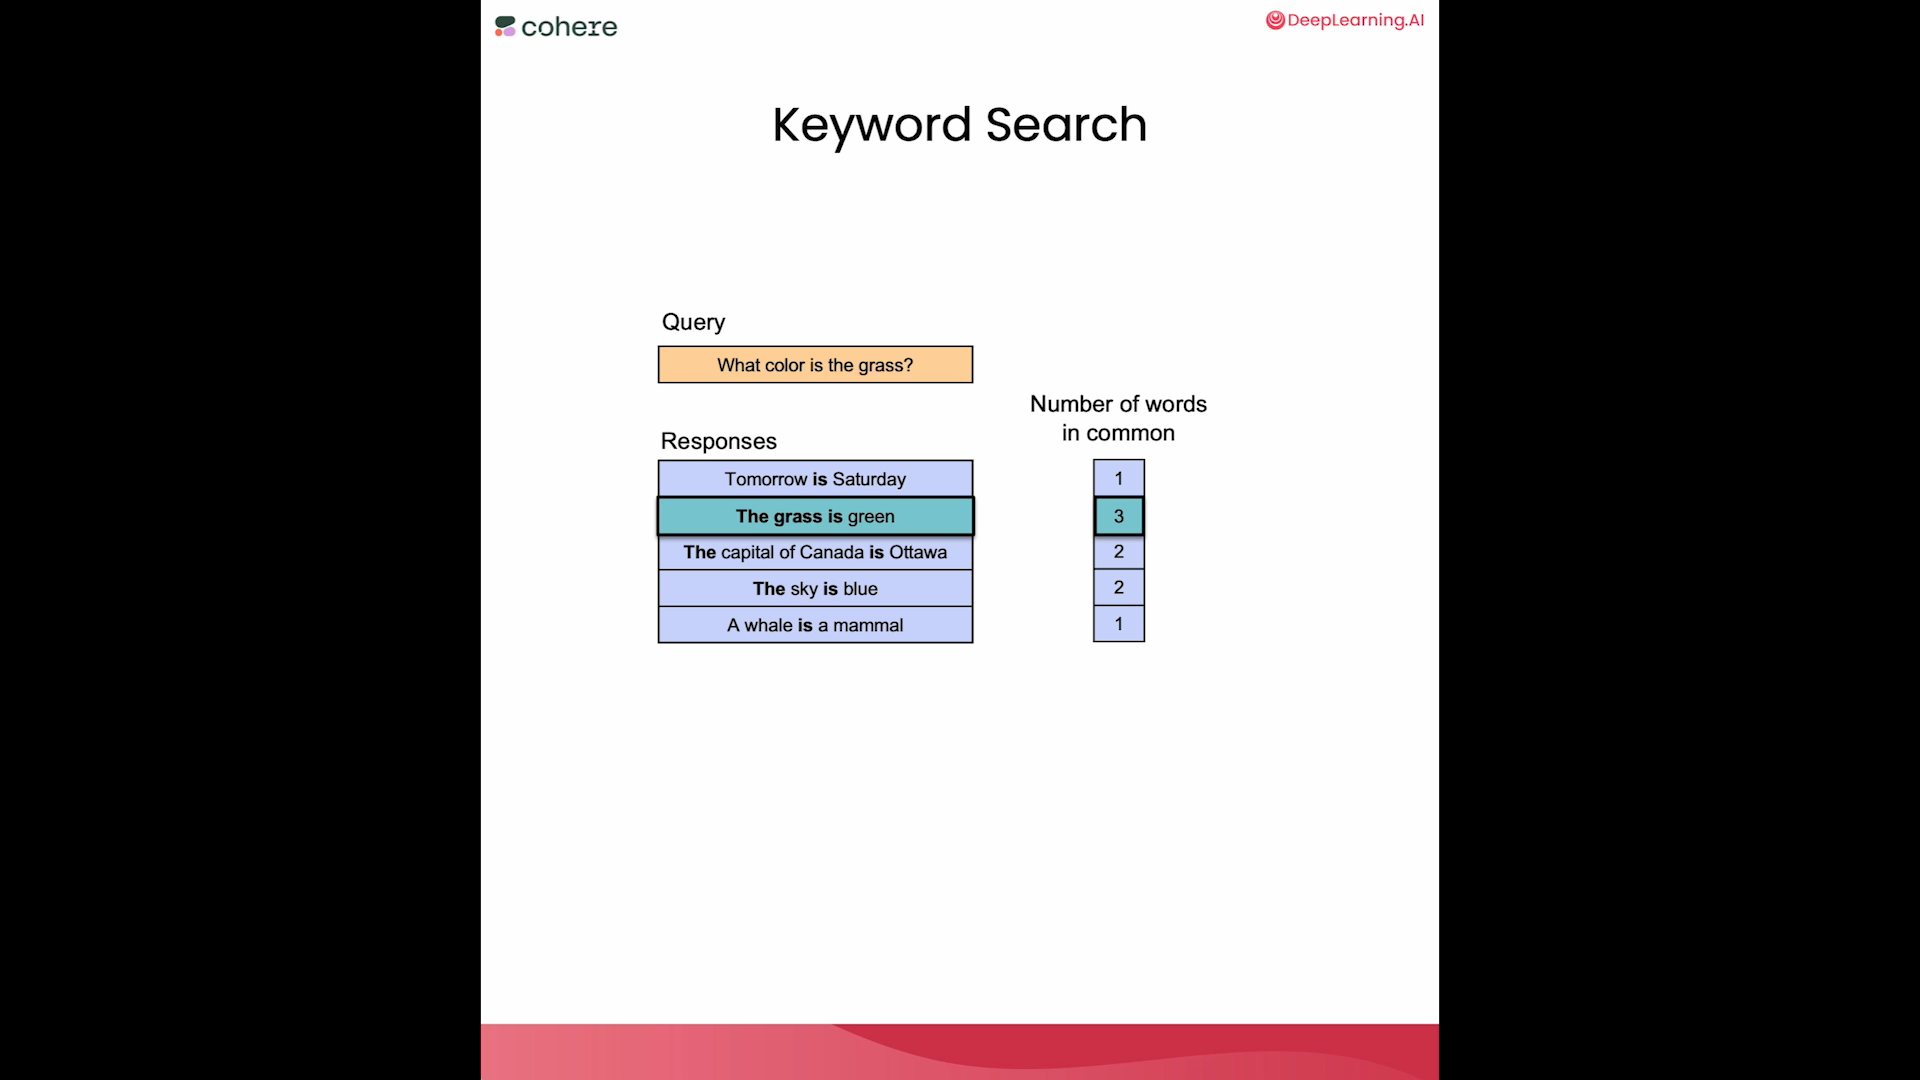

In [2]:
def keyword_search(query,
                   results_lang='en',
                   properties = ["title","url","text"],
                   num_results=3):

    where_filter = {
    "path": ["lang"],
    "operator": "Equal",
    "valueString": results_lang
    }
    
    response = (
        client.query.get("Articles", properties)
        ## bm25 is keyword search or lexical search algorithm in weaviate
        .with_bm25(
            query=query
        )
        .with_where(where_filter)
        .with_limit(num_results)
        .do()
        )

    result = response['data']['Get']['Articles']
    return result

In [3]:
query = "What is the most viewed televised event?"
keyword_search_results = keyword_search(query)
print(keyword_search_results)

[{'text': 'The most active Gamergate supporters or "Gamergaters" said that Gamergate was a movement for ethics in games journalism, for protecting the "gamer" identity, and for opposing "political correctness" in video games and that any harassment of women was done by others not affiliated with Gamergate. They argued that the close relationships between journalists and developers demonstrated a conspiracy among reviewers to focus on progressive social issues. Some supporters pointed to what they considered disproportionate praise for games such as "Depression Quest" and "Gone Home", which feature unconventional gameplay and stories with social implications, while they viewed traditional AAA games as downplayed. False claims of the "ethics in game journalism" had started as early as 2012, when Geoff Keighley was accused of such unethical behavior when he was presenting information about "Halo 4" among advertisements for Mountain Dew and Doritos, an event called "Doritosgate" in the gam

#### Try modifying the search options
- Other languages to try: `en, de, fr, es, it, ja, ar, zh, ko, hi`

In [4]:
properties = ["text", "title", "url", 
             "views", "lang"]
def print_result(result):
    """ Print results with colorful formatting """
    for i,item in enumerate(result):
        print(f'item {i}')
        for key in item.keys():
            print(f"{key}:{item.get(key)}")
            print()
        print()

print_result(keyword_search_results)

item 0
text:The most active Gamergate supporters or "Gamergaters" said that Gamergate was a movement for ethics in games journalism, for protecting the "gamer" identity, and for opposing "political correctness" in video games and that any harassment of women was done by others not affiliated with Gamergate. They argued that the close relationships between journalists and developers demonstrated a conspiracy among reviewers to focus on progressive social issues. Some supporters pointed to what they considered disproportionate praise for games such as "Depression Quest" and "Gone Home", which feature unconventional gameplay and stories with social implications, while they viewed traditional AAA games as downplayed. False claims of the "ethics in game journalism" had started as early as 2012, when Geoff Keighley was accused of such unethical behavior when he was presenting information about "Halo 4" among advertisements for Mountain Dew and Doritos, an event called "Doritosgate" in the ga

In [5]:
query = "What is the most viewed televised event?"
keyword_search_results = keyword_search(query, results_lang='de')
print_result(keyword_search_results)

item 0
text:Das nächste Album "Extinction Level Event: The Final World Front", dessen Titel vom Film "Deep Impact" inspiriert war, enthielt die Single "Gimme Some More", die im Januar 1999 Platz 5 der britischen Charts belegte. Mit Janet Jackson sang er außerdem den Erfolgshit "What’s It Gonna Be?!"

title:Busta Rhymes

url:https://de.wikipedia.org/wiki?curid=238582


item 1
text:Der Begriff Strukturalismus ist vom Wort Struktur abgeleitet und wurde vereinzelt seit Mitte des 19. Jahrhunderts verwendet. In der Psychologie wurde er 1907 von James Rowland Angell in einem Aufsatz über Edward Bradford Titchener eingeführt. In der Sprach- und Literaturwissenschaft wurde er seit den 1920er vom Prager linguistischen Kreis verwendet. Dort knüpfte Roman Jakobson an die Schule des Russischen Formalismus an und verwendete den Begriff „Strukturalismus“ erstmals 1929 in einem in der Prager Zeitschrift "Čin" auf Tschechisch unter dem Titel "Romantischer Panslawismus – neue Slawistik" ("Romantické vše

Results that we are getting are not the best relevant answers from Keyword search is not correct. 

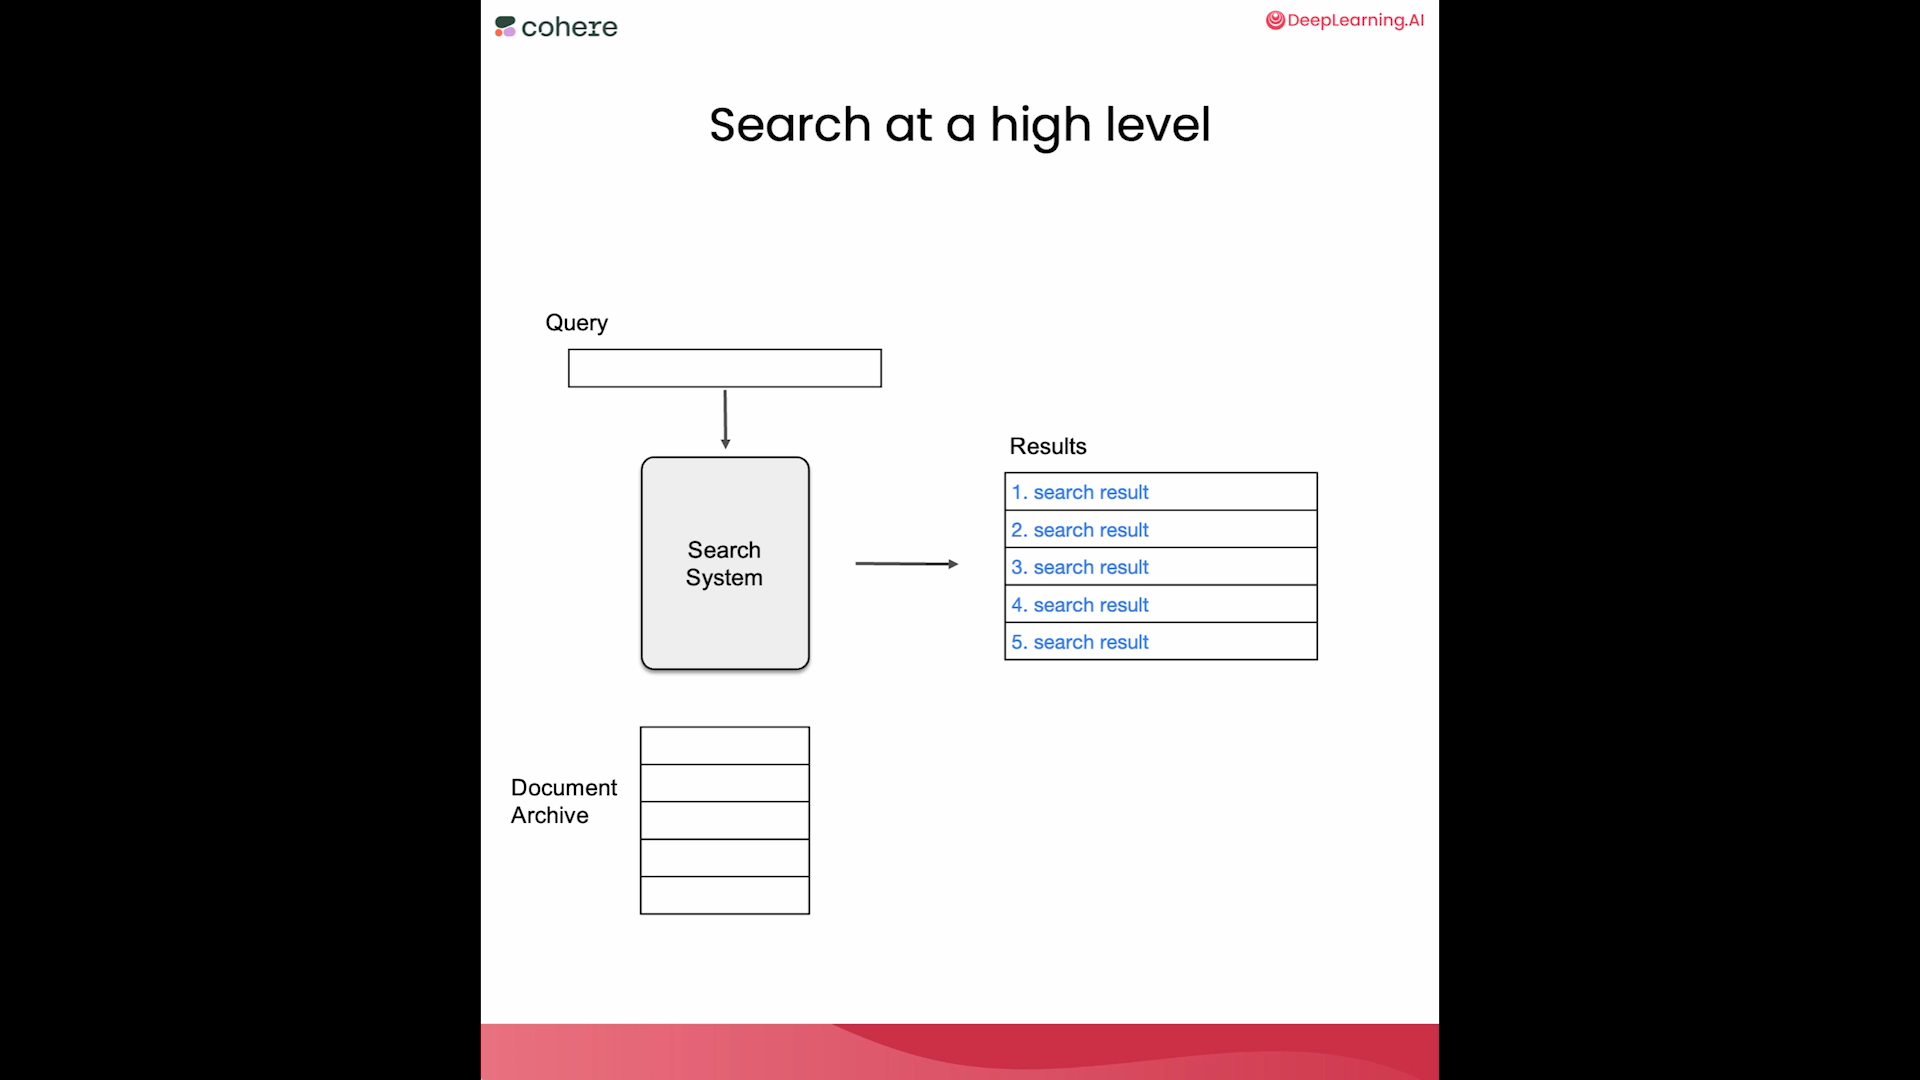

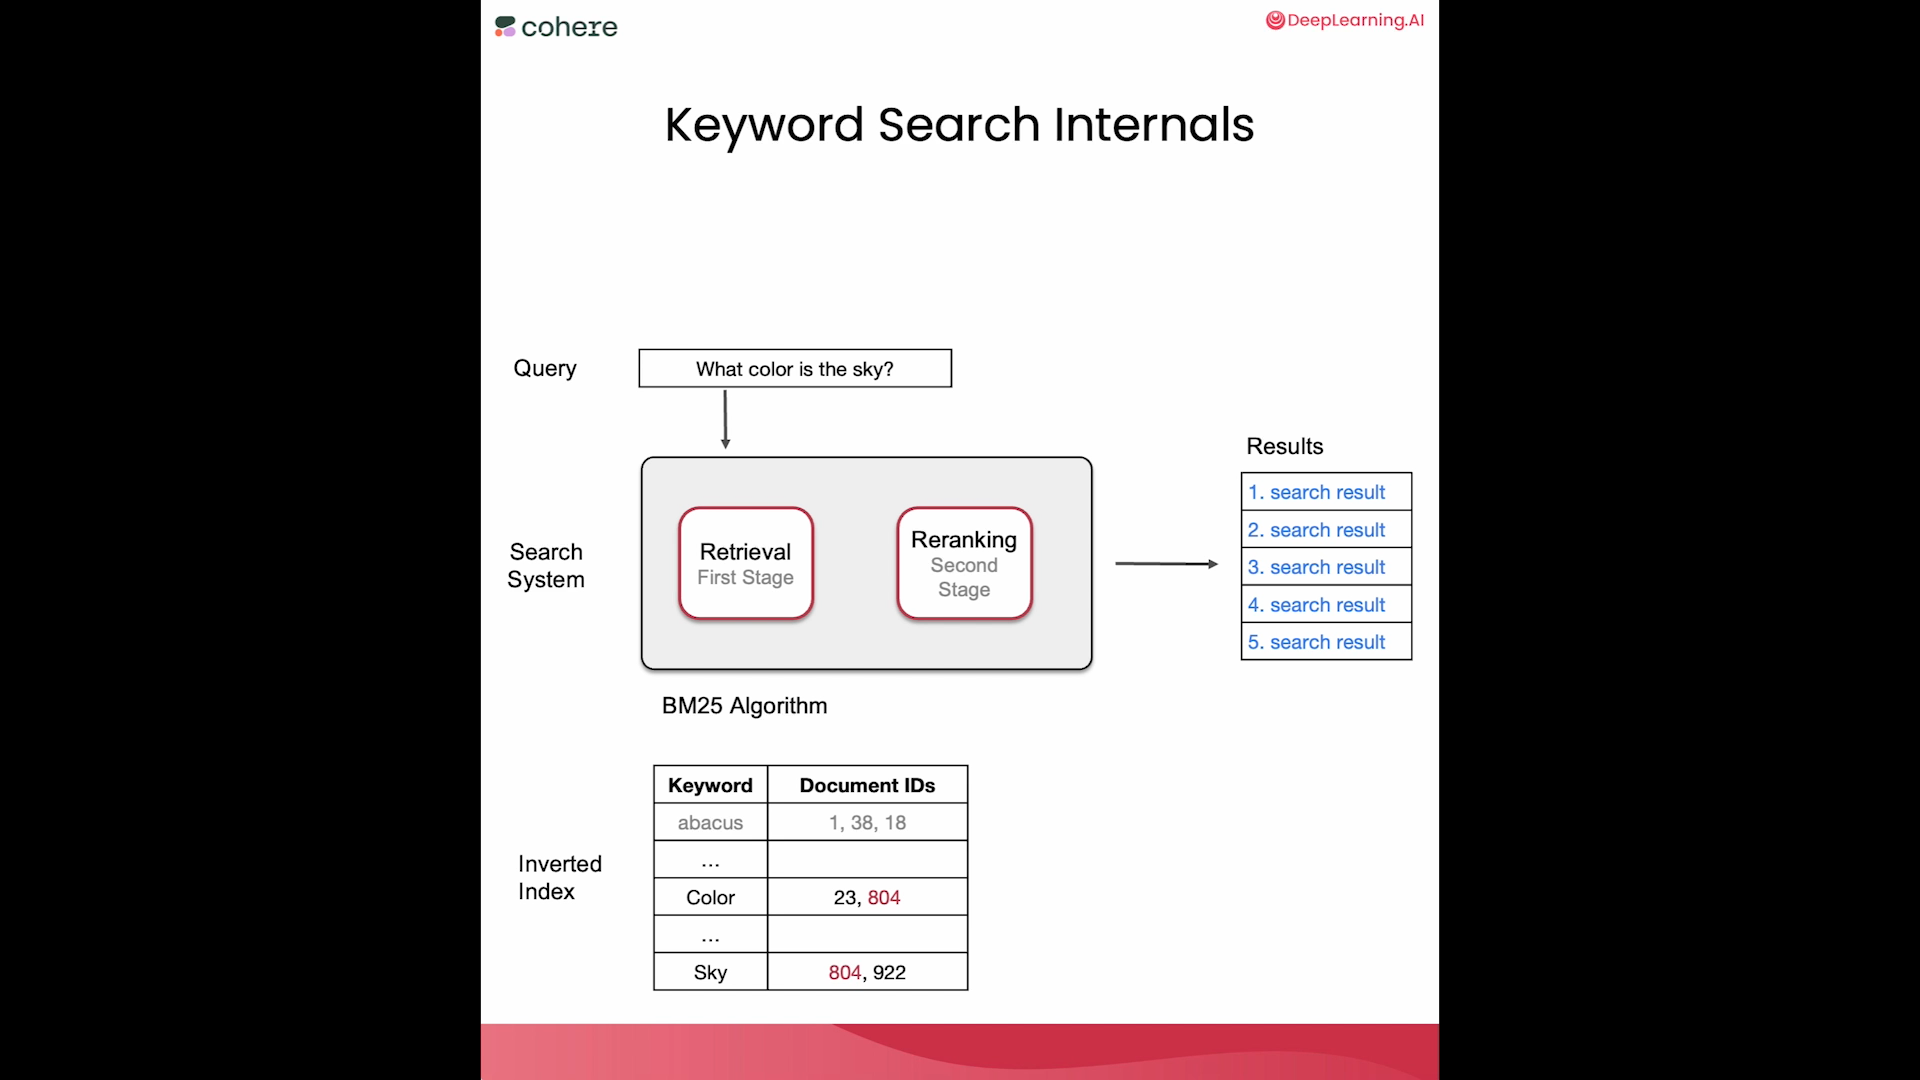

Keywords will only do search based on keywords. They will not understand the meaning.

LLM Model helps here. LLM can understand the meaning of query and then search in database based on semantics/meaning 

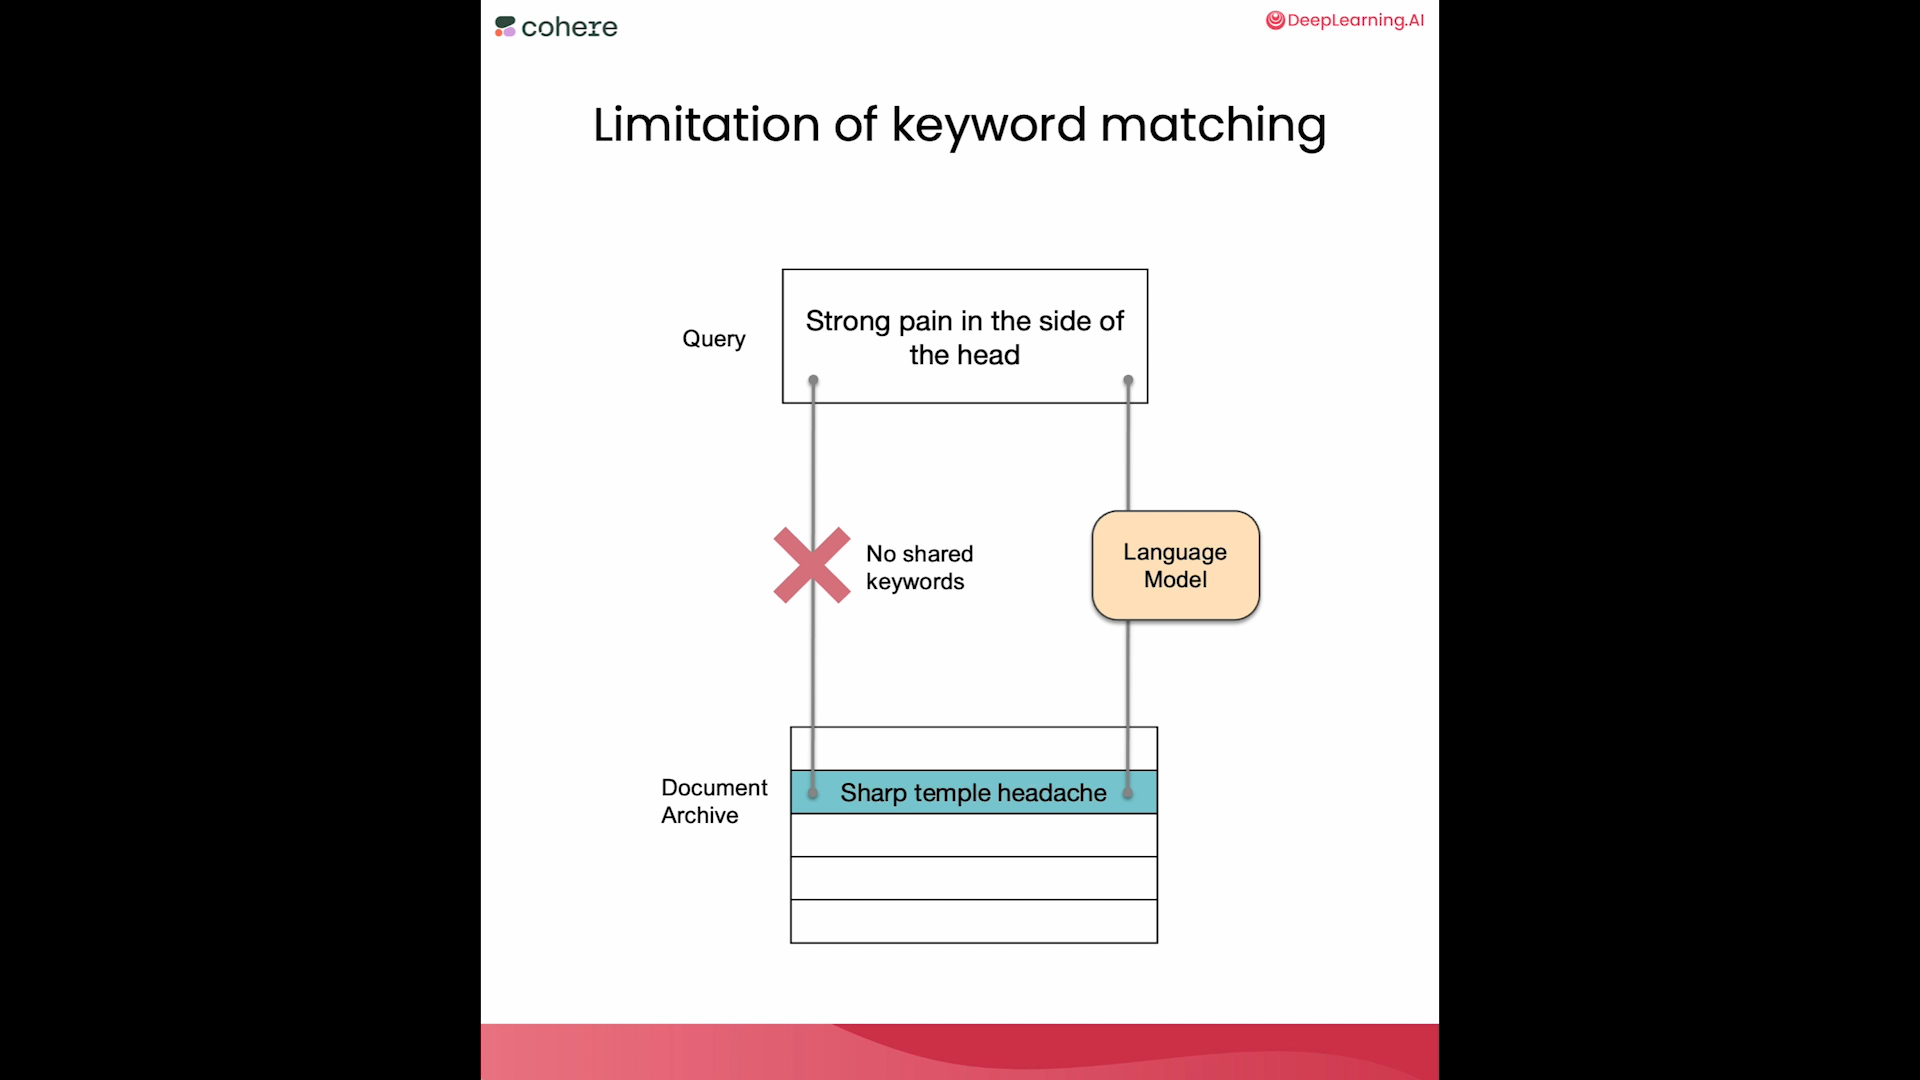

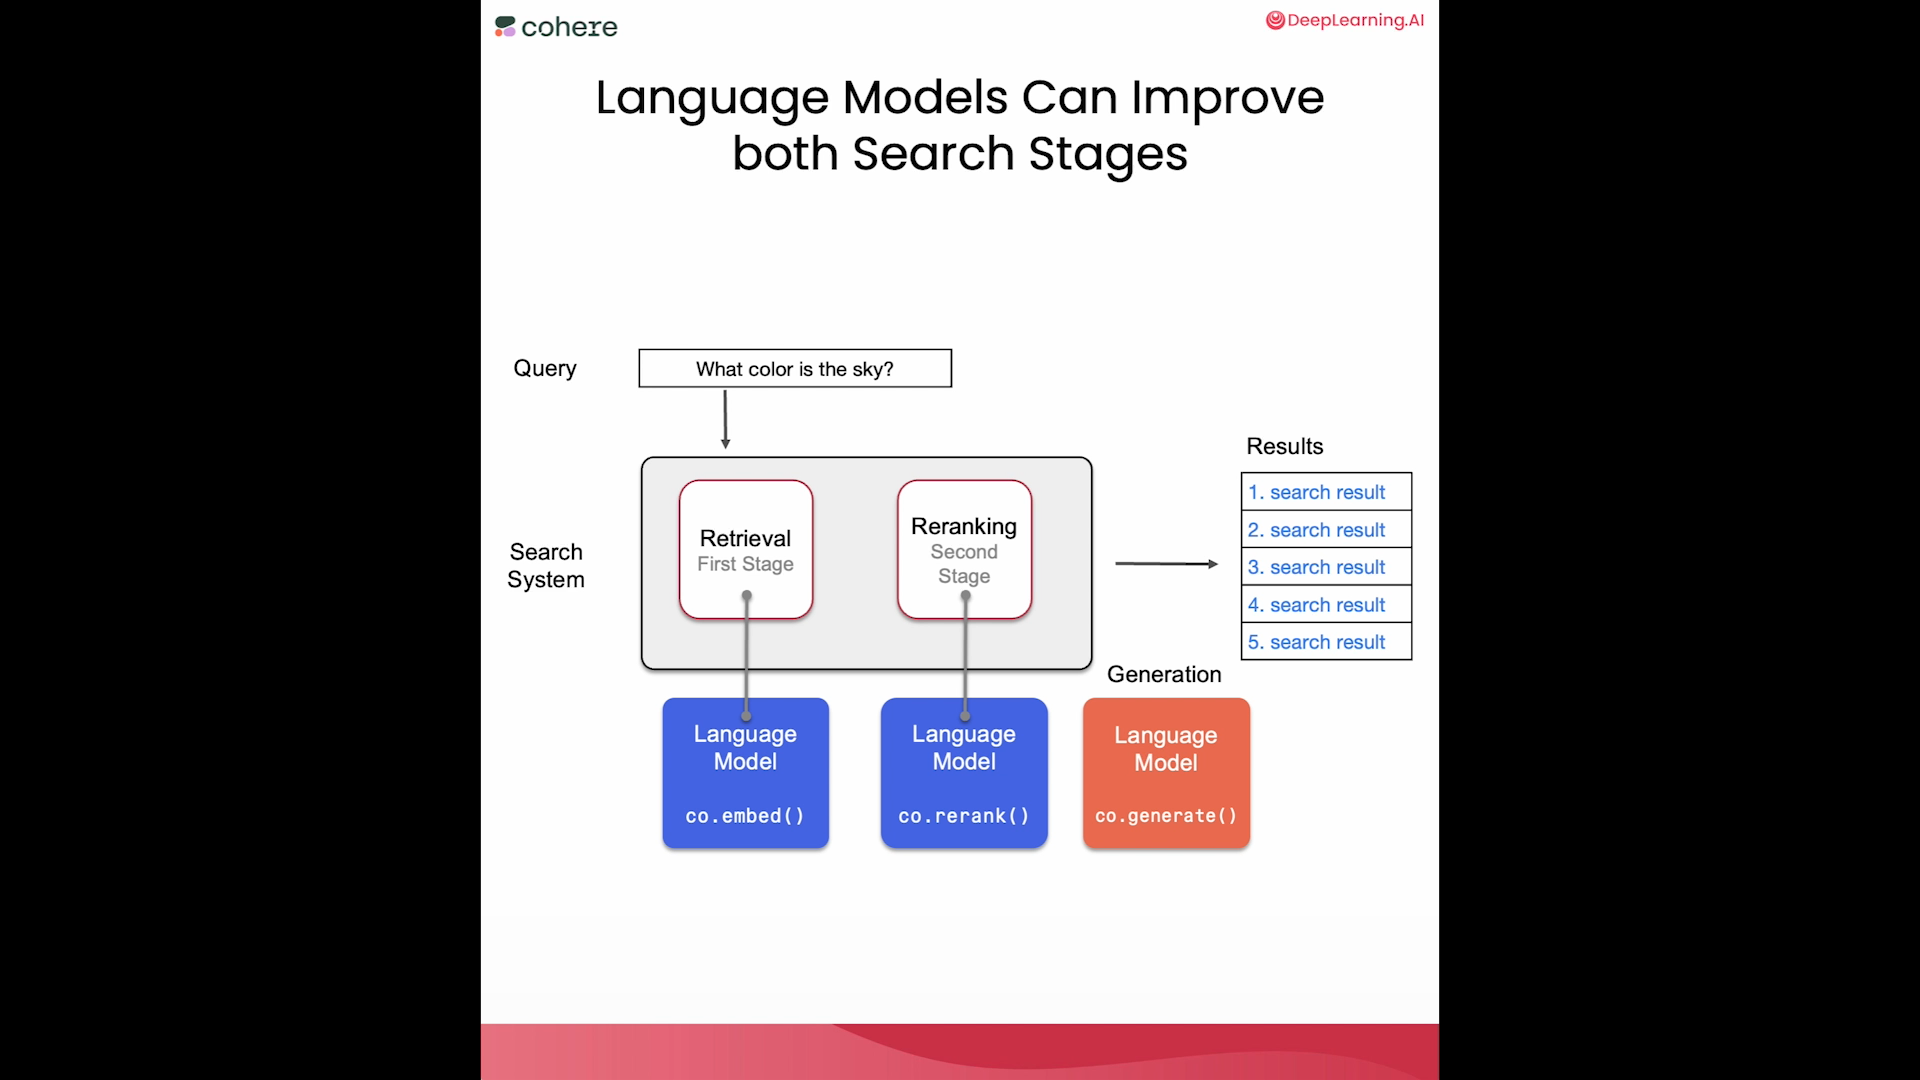